# Ichimoku Cloud Study
## Random Forrest

I want to predict price movements of S&P 500 stocks given bullish crossover signals from Ichimoku clouds. The signal 
has two criteria:
1. Conversion line moves above base line (Crossover)
2. Price is above cloud

### Features
#### Existing
1. ~~open~~
2. ~~high~~
3. ~~low~~
4. ~~close~~
5. ~~volume~~
6. ~~dividend amount~~

#### Technical Indicators
1. ~~tenken_sen~~ (replaced with close_diff_tenkan_sen_percent)
2. ~~kijun_sen~~ (replaced with close_diff_kijun_sen_percent)
3. ~~senkou_span_a~~ (replaced with close_diff_senkou_span_a_percent)
4. ~~senkou_span_b~~ (replaced with close_diff_senkou_span_b_percent)
5. ~~chikou_span~~ (forward bias)
6. RSI (period = 14 day)
7. RMI (time_period = 14 day, momentum_period = 5 day)
8. MFI (period = 14 day)
9. MACD Hist (fastperiod = 12 day, slowperiod = 26 day, signalperiod = 9 day)
10. Rel. SPY (TODO)

#### Engineered
1. close_diff_tenkan_sen_percent
2. close_diff_kijun_sen_percent
3. close_diff_senkou_span_a_percent
4. close_diff_senkou_span_b_percent
5. days_since_earnings
6. crossover_difference
7. crossover_indicator
8. close_price_diff_1_day
9. close_to_365_day_high
10. close_to_365_day_low
12. close_to_{N*7}_day_low
13. volume_percent_of_2_week_total
14. dividend_amount_to_close

### Issues
- RandomForestRegressor only predicts positive targets.

In [2]:
import sys

# Manually specify the path to your project root
project_root = '/stock-market-patterns'
sys.path.insert(0, project_root)



import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

import importlib

# After updating the package
import tools.data_helper
importlib.reload(tools.data_helper)

from tools.machine_learning_helper import find_first_below_threshold
from tools.data_helper import process_data
from sklearn.metrics import mean_squared_log_error, mean_squared_error
# TECH DEBT: determine which symbols have high accuracy...

### Load data

### Earnings Dates

### Feature Engineering

In [0]:
data_path = '../../../res/data/s_and_p_study_data_TESTING.h5'
df_dict, dropped_symbols, target_col = process_data(data_path, days_into_future=10)

In [5]:
df_dict['/prices/A']


,spy_close_diff_tenkan_sen_percent,spy_close_diff_kijun_sen_percent,spy_close_diff_senkou_span_a_percent,spy_close_diff_senkou_span_b_percent,days_since_earnings,rsi,mfi,rmi,macd,macd_signal,...,close_to_70_day_low,close_to_77_day_high,close_to_77_day_low,close_to_84_day_high,close_to_84_day_low,highest_close_next_10_days_percent,close_diff_tenkan_sen_percent,close_diff_kijun_sen_percent,close_diff_senkou_span_a_percent,close_diff_senkou_span_b_percent
date,,,,,,,,,,,,,,,,,,,,,
2014-12-30 16:00:00-05:00,-0.008518,0.006107,0.025007,0.060496,43,49.395416,44.779602,46.107226,0.039255,-0.014364,...,1.064206,0.957885,1.097052,0.957885,1.097052,0.001241,-0.002923,0.009929,0.013901,0.040304
2016-07-11 16:00:00-04:00,0.023523,0.038531,0.041777,0.047192,56,61.609314,68.028625,47.762323,0.210158,0.085766,...,1.151299,0.999371,1.151299,0.999371,1.151299,0.010316,0.037015,0.051152,0.053716,0.098575
2016-12-14 16:00:00-05:00,0.010830,0.029364,0.069568,0.063603,29,60.116442,74.540441,72.195986,0.306019,0.072100,...,1.077528,0.976305,1.077528,0.976305,1.077528,-0.001074,0.024422,0.026455,0.032774,0.020381
2017-04-23 16:00:00-04:00,0.009406,0.010137,0.009541,0.028847,68,66.299845,56.402631,60.893088,0.348049,0.307972,...,1.083070,1.000000,1.107691,1.000000,1.144869,0.041514,0.019142,0.019619,0.040880,0.089394
2017-07-10 16:00:00-04:00,0.001447,-0.000640,0.010939,0.022653,49,55.426258,56.215799,49.853511,0.275881,0.338651,...,1.074668,0.985599,1.093092,0.985599,1.129343,0.029264,0.008007,0.008654,0.029002,0.056948
2018-01-03 16:00:00-05:00,0.008203,0.022060,0.058983,0.073000,44,59.518475,56.724172,81.610697,0.179210,-0.019183,...,1.047441,0.976811,1.047441,0.976811,1.047441,0.062064,0.007825,0.010072,0.003830,0.026083
2018-02-21 16:00:00-05:00,0.023777,0.002317,-0.008392,0.011919,7,51.235632,49.229951,38.910134,0.029713,-0.102309,...,1.086549,0.944667,1.086549,0.944667,1.086549,0.000283,0.007699,0.009498,0.016379,0.024902
2018-09-04 16:00:00-04:00,0.001542,0.012542,0.035681,0.049240,21,57.424549,74.246408,65.900168,0.549300,0.453935,...,1.095159,0.989654,1.097846,0.989654,1.097846,0.038829,0.005556,0.011710,0.043462,0.053626
2019-10-27 16:00:00-04:00,0.009519,0.030458,0.029746,0.042892,74,56.682934,42.655681,75.461255,0.242593,0.217184,...,1.098344,0.977494,1.163485,0.977494,1.163485,0.010768,0.013105,0.015654,0.019001,0.059240


In [3]:
# TECH DEBT: optimize hyperparameter

test_length = 2
min_date = pd.Timestamp('2010-10-01 16:00:00', tz='US/Eastern')
final_df_test_x_list = []
final_df_test_y_list = []
final_df_train_x_list = []
final_df_train_y_list = []
for key, df in df_dict.items():
    final_df = df.loc[df.index >= min_date]
    final_df = final_df.reset_index(drop=True)
    
    end_point = len(final_df)
    x = end_point - test_length
    final_df_train = final_df.loc[:x - 1, :]
    final_df_test = final_df.loc[x:, :]
    
    final_df_test_x_list.append(final_df_test.loc[:, [col for col in final_df_test.columns if col not in [target_col]]])
    final_df_test_y_list.append(final_df_test[target_col])
    final_df_train_x_list.append(final_df_train.loc[:, [col for col in final_df_test.columns if col not in [target_col]]])
    final_df_train_y_list.append(final_df_train[target_col])
    
final_df_test_x = pd.concat(final_df_test_x_list)
final_df_test_y = pd.concat(final_df_test_y_list)
final_df_train_x = pd.concat(final_df_train_x_list)
final_df_train_y = pd.concat(final_df_train_y_list)


In [4]:
n_features_to_select = 30
print("Starting model train..")
rfe = RFE(RandomForestRegressor(n_estimators=100, random_state=1), n_features_to_select=n_features_to_select)
fit = rfe.fit(final_df_train_x, final_df_train_y)
y_pred = fit.predict(final_df_test_x)

Starting model train..


In [5]:

y_true = final_df_test_y.values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
rmse

0.04631677276753795

In [6]:
# Get the mask of the selected features
selected_features_mask = rfe.support_

# Get the rankings of the features
feature_ranking = rfe.ranking_

# Get the names of the selected features
selected_features = final_df_train_x.columns[selected_features_mask]

print("Selected features:", list(selected_features))
print("Feature ranking:", feature_ranking)

Selected features: ['spy_close_diff_tenkan_sen_percent', 'spy_close_diff_kijun_sen_percent', 'spy_close_diff_senkou_span_a_percent', 'spy_close_diff_senkou_span_b_percent', 'days_since_earnings', 'rsi', 'mfi', 'rmi', 'macd', 'macd_signal', 'macd_hist', 'close_price_diff_1_day', 'crossover_difference', 'volume_percent_of_2_week_total', 'close_to_365_day_high', 'close_to_365_day_low', 'close_to_14_day_low', 'close_to_21_day_low', 'close_to_28_day_low', 'close_to_35_day_low', 'close_to_42_day_high', 'close_to_42_day_low', 'close_to_49_day_low', 'close_to_63_day_low', 'close_to_70_day_low', 'close_to_77_day_low', 'close_to_84_day_high', 'close_to_84_day_low', 'close_diff_kijun_sen_percent', 'close_diff_senkou_span_b_percent']
Feature ranking: [ 1  1  1  1  1  1  1  1  1  1  1  1  1 18  1 16  8  1  1 17  9 15  1 12
  1 14  1  3  1  1  1  4  1 11  2 13  1  7  1  5  1  1  1 10  1  6  1]


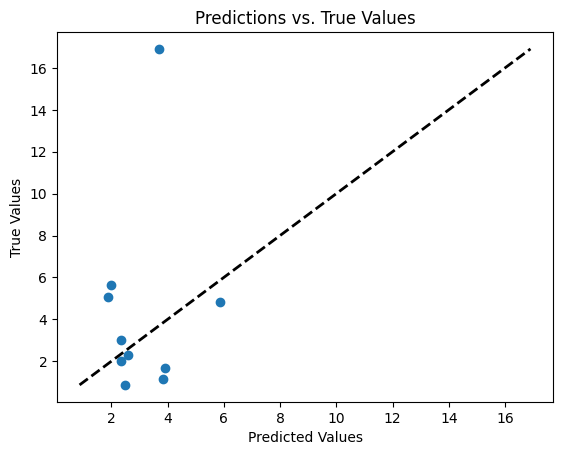

In [7]:
import matplotlib.pyplot as plt
# Optionally, add a line for perfect correlation for reference
actual_values = y_true * 100
predicted_values = y_pred * 100
plt.scatter(predicted_values, actual_values)
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'k--', lw=2)
plt.title('Predictions vs. True Values')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()


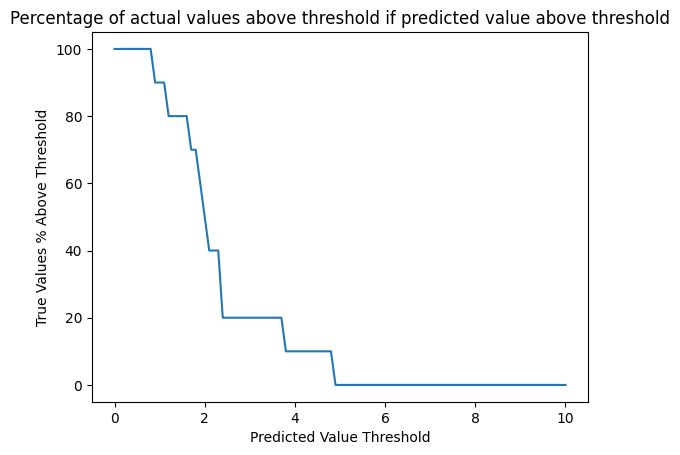

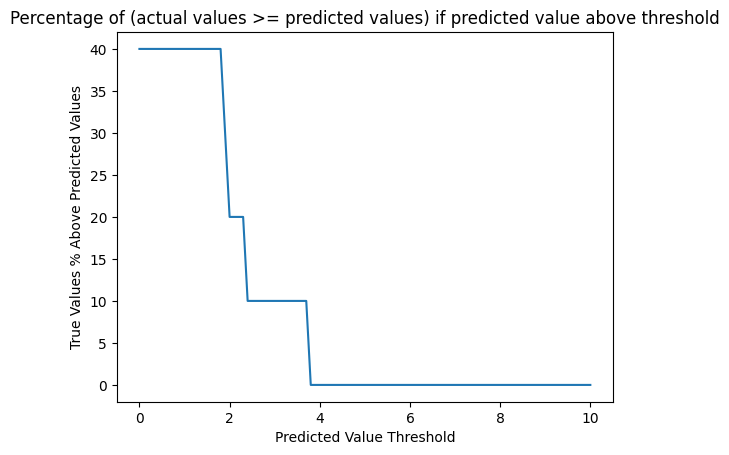

In [8]:
actual_vs_thresh_prob = []
x = np.linspace(0, 10, 101)
for prediction_threshold in x:
    # what percentage of predicted_values above prediction_threshold had an actual_value above prediction_threshold
    actual_vs_thresh_prob.append(100 * ((actual_values > prediction_threshold * 1.0) & (predicted_values > 
                                                                              prediction_threshold)).mean())

plt.plot(x, actual_vs_thresh_prob)
plt.title('Percentage of actual values above threshold if predicted value above threshold')
plt.xlabel('Predicted Value Threshold')
plt.ylabel('True Values % Above Threshold')
plt.show()

actual_vs_pred_prob = []
# x = np.linspace(0, 10, 51)
for prediction_threshold in x:
    # what percentage of predicted_values above prediction_threshold had an actual_value above prediction_threshold
    actual_vs_pred_prob.append(100 * ((actual_values >= predicted_values) & (predicted_values > 
                                                                              prediction_threshold)).mean())

plt.plot(x, actual_vs_pred_prob)
plt.title('Percentage of (actual values >= predicted values) if predicted value above threshold')
plt.xlabel('Predicted Value Threshold')
plt.ylabel('True Values % Above Predicted Values')
plt.show()

In [9]:
x[find_first_below_threshold(actual_vs_thresh_prob, 50)]

2.1

In [10]:

# Use MSLE to penalize underestimates...need to modify to penalize overestimates
# Ensure that neither actual_values nor predicted_values contain negative values
actual_values_adj = np.maximum((1 + actual_values/100), 0)
predicted_values_adj = np.maximum((1 + predicted_values/100), 0)
# Swap the actual and predicted values to punish overestimates.
modified_msle = mean_squared_log_error(predicted_values_adj, actual_values_adj)

print("Mean Squared Logarithmic Error:", modified_msle)
"Mean Squared Logarithmic Error: 0.0003165310587558688"

Mean Squared Logarithmic Error: 0.0004917280509149902


'Mean Squared Logarithmic Error: 0.0003165310587558688'

/Users/seanbearden/PycharmProjects/stock-market-patterns/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/seanbearden/PycharmProjects/stock-market-patterns/venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


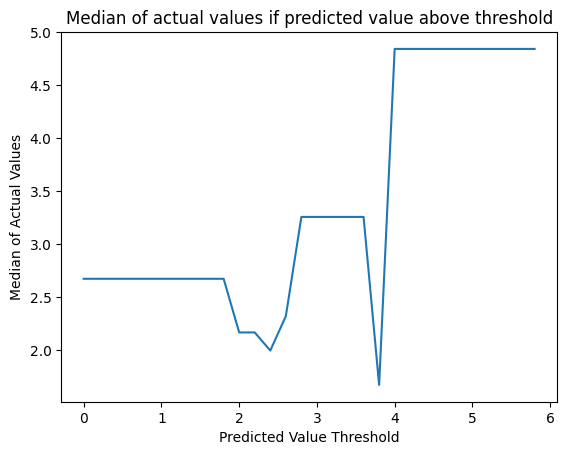

In [11]:
y = []
x = np.linspace(0, 10, 51)
for prediction_threshold in x:
    y.append(np.median(actual_values[predicted_values >= prediction_threshold]))
plt.plot(x, y)
plt.title('Median of actual values if predicted value above threshold')
plt.xlabel('Predicted Value Threshold')
plt.ylabel('Median of Actual Values')
plt.show()

In [12]:
slice = actual_values[predicted_values >= 4]
np.median(slice)
# slice
# y

4.842171294762234